<a href="https://colab.research.google.com/github/Uday-Bairapaka/Lane-Line-Detection/blob/main/Lane_Line_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lane Line Detection**

The steps of this project are the following:

Compute the camera calibration matrix and

*   distortion coefficients given a set of chessboard images.
*   Apply a distortion correction to raw images.
*   Apply a perspective transform to rectify binary image ("birds-eye view").
*   Use color transforms, gradients, etc., to create a thresholded binary image.
*   Detect lane pixels and fit to find the lane boundary.
*   Determine the curvature of the lane and vehicle position with respect to center.
*   Warp the detected lane boundaries back onto the original image.
*   Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Importing libraries

In [ ]:
# Importing useful files from our github respository

!git clone https://github.com/Poojith764/Lane_Line_Detection
%cd Lane_Line_Detection/

Cloning into 'Lane_Line_Detection'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 141 (delta 10), reused 57 (delta 2), pack-reused 64
Receiving objects: 100% (141/141), 95.78 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Lane_Line_Detection/Lane_Line_Detection


In [ ]:
!pip install moviepy

!pip3 install imageio==2.4.1

!pip install --upgrade imageio-ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=58078a7a04d4bac7aacfd06a188bb7353565a3b4d5fc4acdbf37e0e686f2125b
  Stored in directory: /root/.cache/pip/wheels/96/5d/ce/bdbdb04744dac03906336eb0d01ff1e222061d3419c55c55f9
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video
from moviepy.editor import VideoFileClip
from PerspectiveTransformation import *
from LaneLines import *

# Adding test images to different lists

In [ ]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [ ]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [ ]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

# Image transformation (Converting to gray colour)

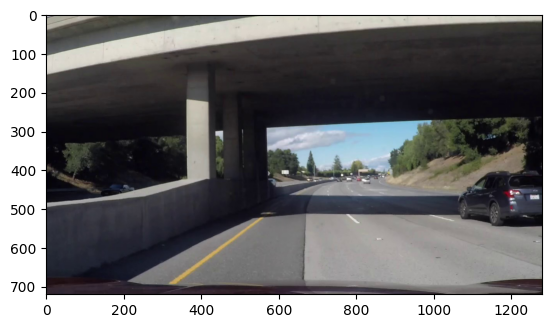

In [ ]:
# Code for Perspective Transformation is written seperately in this same file and imported to make code more simple.

img = images[3]
birdeye = PerspectiveTransformation()
plt.imshow(img)

In [ ]:
def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

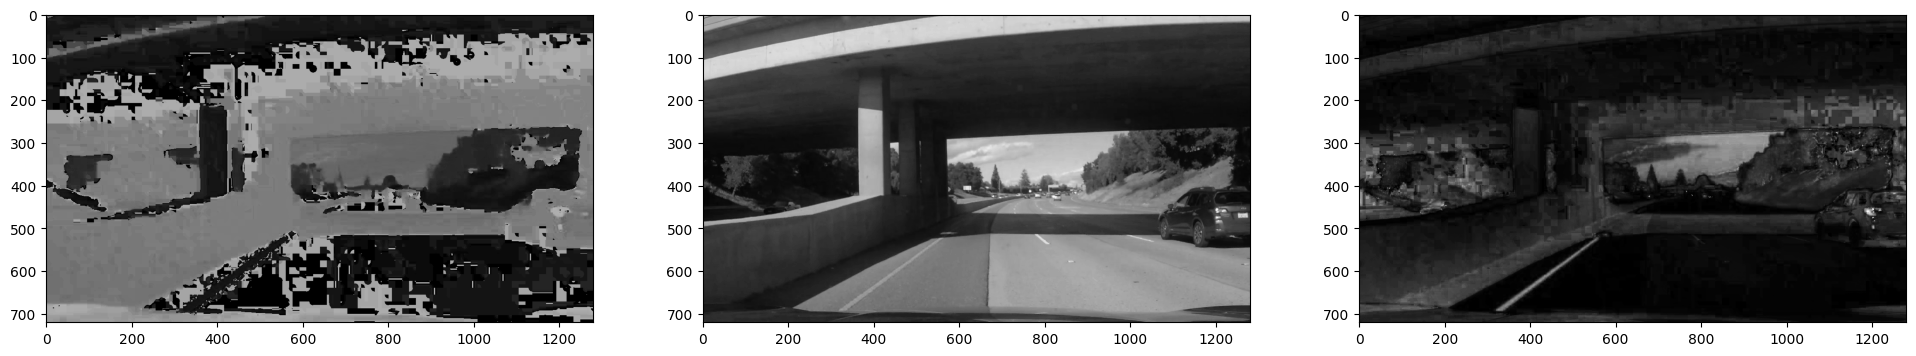

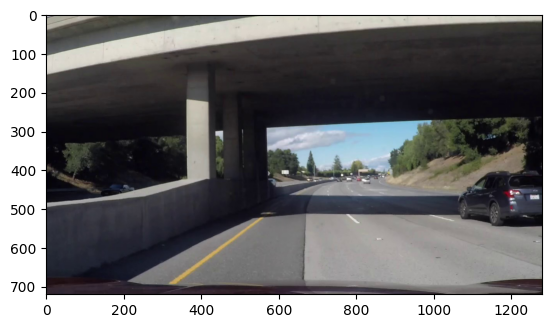

In [ ]:
plot(img)

# Thresholding

In [ ]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)

    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [ ]:
def test(img):
    tmp = birdeye.forward(img)
    tmp = np.copy(img)
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    f = plt.figure(figsize=(24, 16))
    ax1 = f.add_subplot(2, 2, 1)
    ax1.imshow(tmp)
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')

    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')

    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

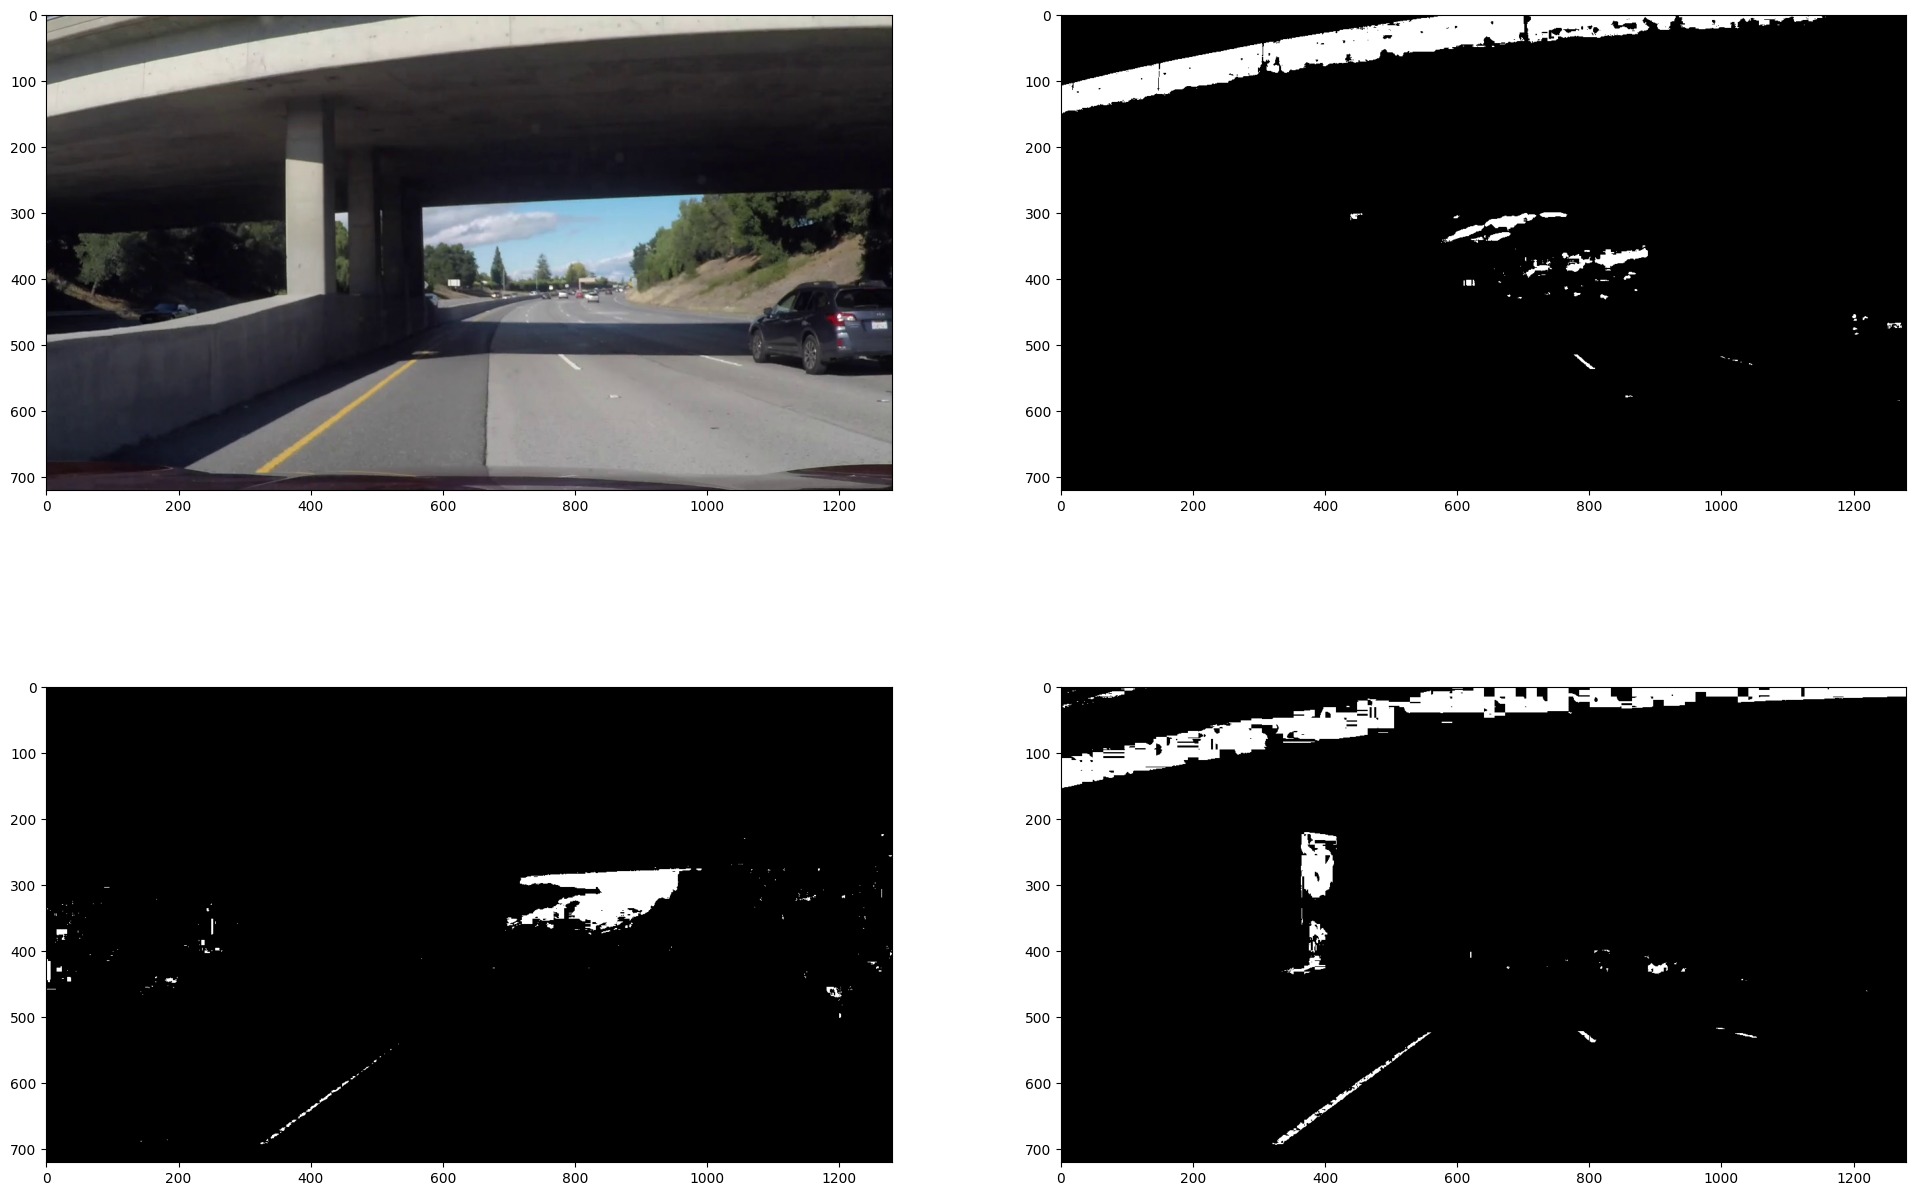

In [ ]:
test(images[3])

# Perspective Transformation

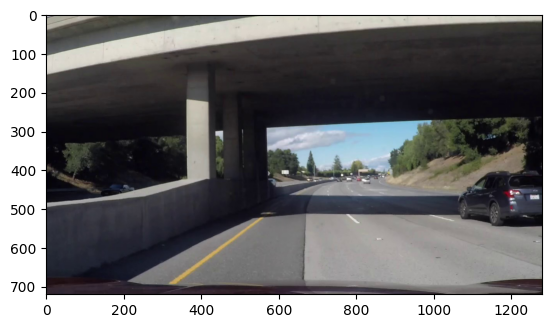

In [ ]:
img = images[3]
plt.imshow(img)

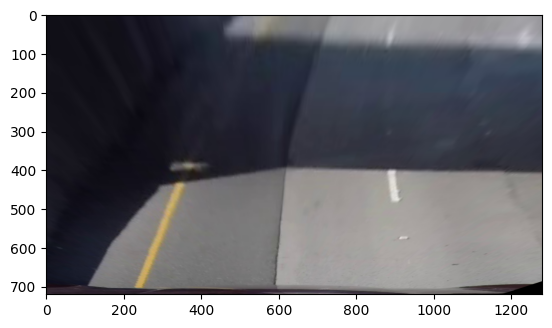

In [ ]:
img1 = birdeye.forward(img)
plt.imshow(img1)

#Applying Both thresholding and perspective transformation

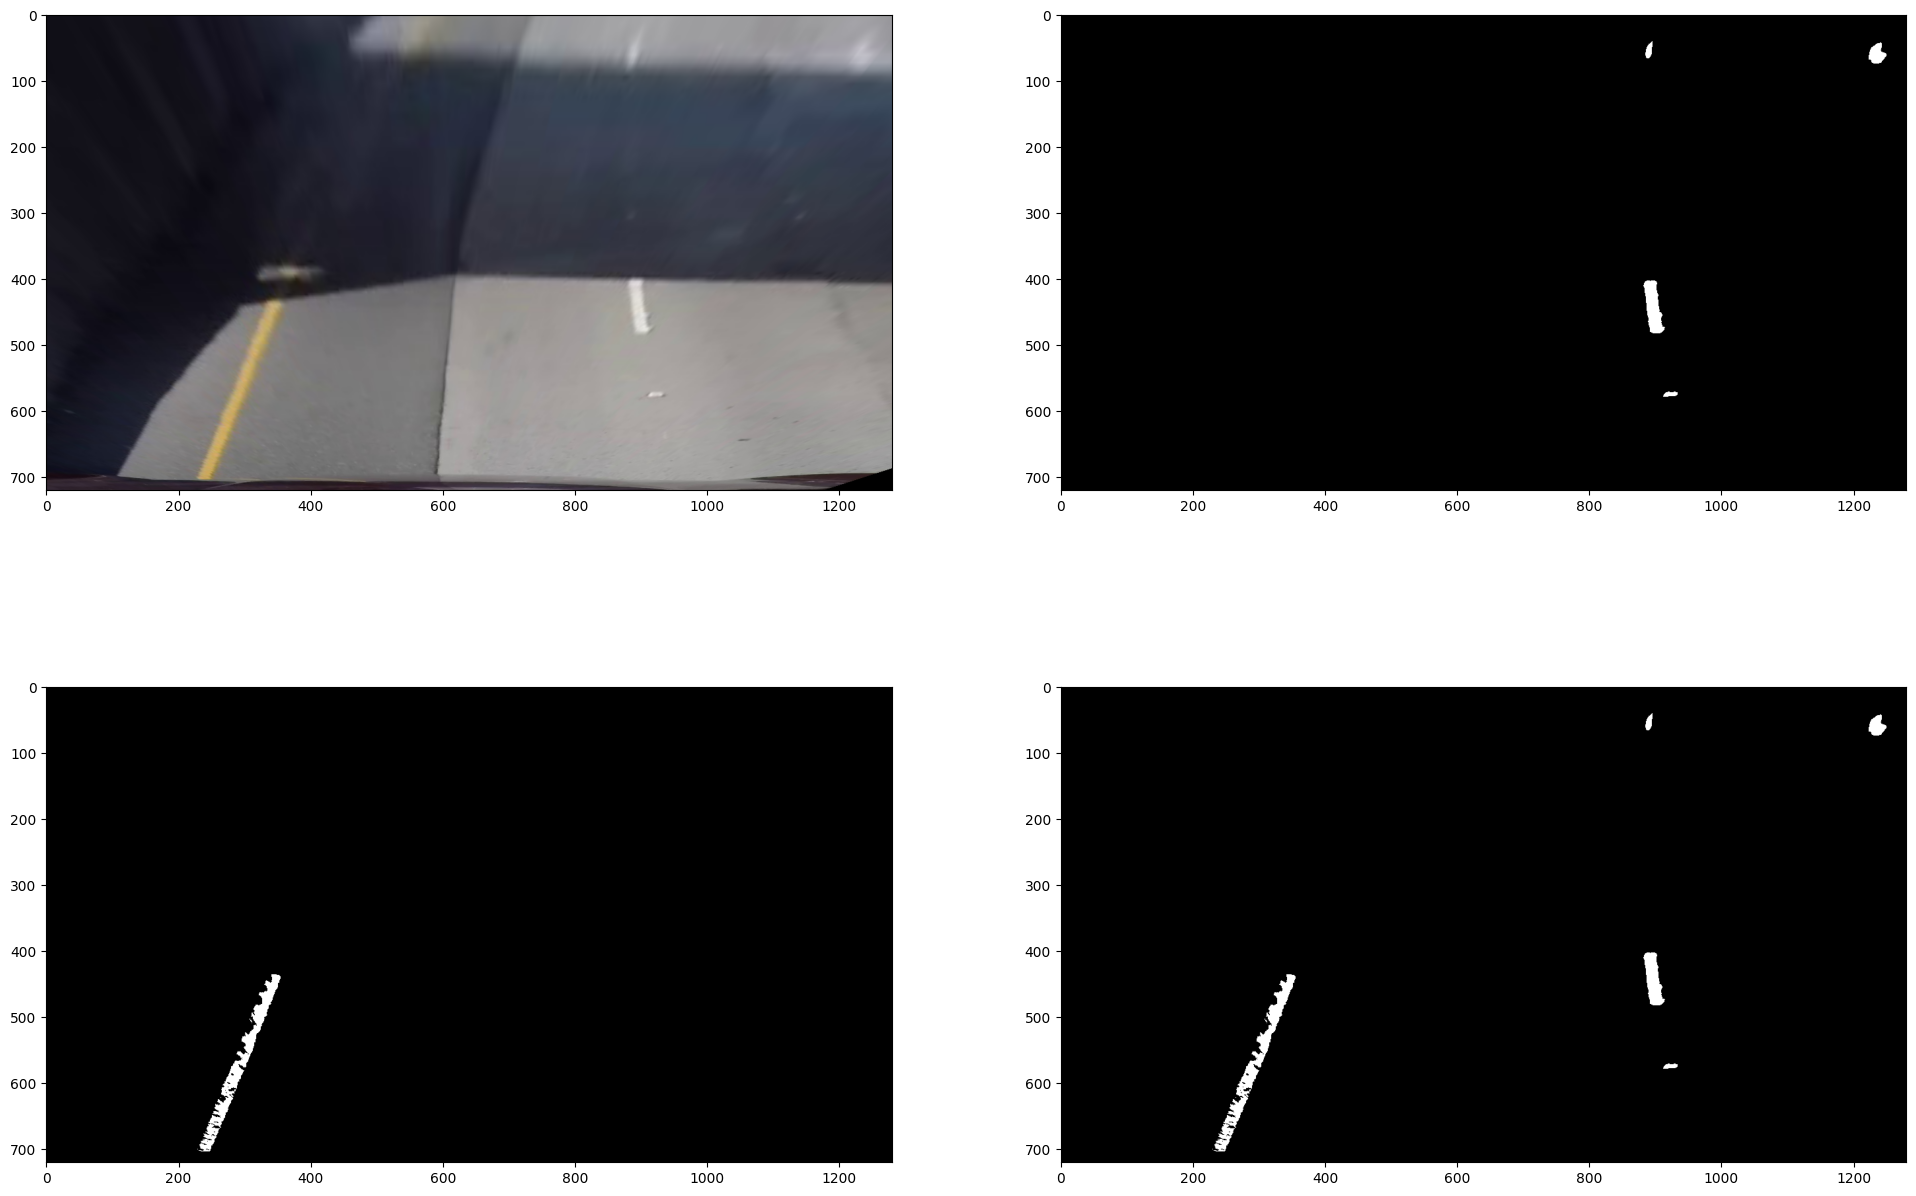

In [ ]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = threshold_rel(l_channel, 0.8, 1.0)
# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = threshold_abs(h_channel, 20, 30)
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

#Applying lane lines on threshold image

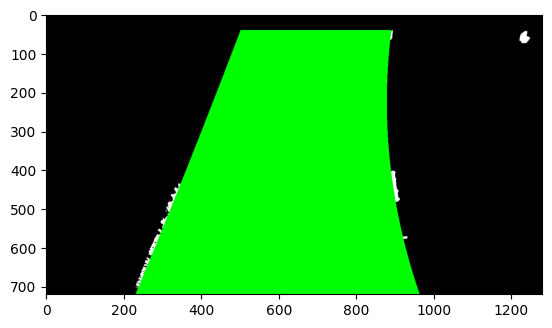

In [ ]:
lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)

# Applying back detected lines on original image

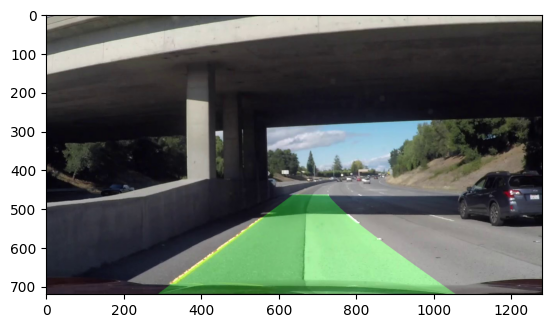

In [ ]:
img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

# Image Processing

In [ ]:
birdeye = PerspectiveTransformation()
lanelines = LaneLines()
def process_image(img):
    # step 1
    img1 = birdeye.forward(img)
#     img1 = np.copy(img)

    # step 2
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane

#     img2 = birdeye.forward(img2)

    # step 3
    img3 = lanelines.forward(img2)

    # step 4
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)

    return out_img

# Testing Image


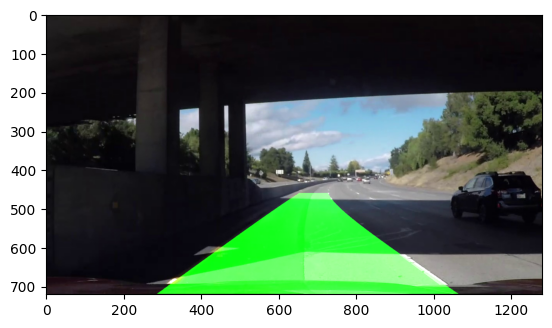

In [ ]:
try:
  tmp = process_image(images[4])
except:
  tmp = process_image(images[2])
  tmp = process_image(images[4])
plt.imshow(tmp)

# Giving input as video

In [ ]:
clip = VideoFileClip("project_video.mp4")

# Output Video

In [ ]:
out_clip = clip.fl_image(process_image)
out_clip.write_videofile("output_videos/harder_challenge_video_output.mp4", audio=False)

Moviepy - Building video output_videos/harder_challenge_video_output.mp4.
Moviepy - Writing video output_videos/harder_challenge_video_output.mp4



Moviepy - Done !
Moviepy - video ready output_videos/harder_challenge_video_output.mp4


In [ ]:
!pip install scikit-learn==0.22.1